# Data Preparation and Data Pre-processing

**by Alisa Lincke**

This notebook will focus on preparing the data for machine learning with Python.

We will be using the following Python libraries: `numpy`, `pandas`, `matplotlib`, and `sklearn`.

The data preparation phase in an ML pipeline may include the following steps:
1. Loading the dataset
2. Cleaning the data and dealing with missing values
3. Pre-analysis of dataset in order to understand the data and gain insights:
    - visualizing the dataset
    - calculating descriptive statistics
4. Identifying features/predictors (independent variables) and target (dependent variable) 
5. Correlation between dependent and independent variable


In [1]:
#Import the libraries and print their versions
import sys
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 1.0.1
Numpy: 1.18.1
Matplotlib: 3.1.3
Sklearn: 0.22.2.post1


## Loading the dataset

The example dataset from the machine learning repository of the University of California, Irvine is available through the following URL: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

Atttributes description:
 1. age: age in years
 2. sex: gender (1 = male; 0 = female)
 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 5. chol: serum cholestoral in mg/dl
 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
 7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
 8. thalach: maximum heart rate achieved
 9. exang: exercise induced angina (1 = yes; 0 = no)
 10. oldpeak = ST depression induced by exercise relative to rest
 11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
 12. ca: number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 14. class: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        


To import the data, we will use `pandas`' built-in function <code>read_csv()</code>. 
The dataset does not have first header column in .csv file. Therefore, we will create a header for our dataframe based on data descrption provided in the URL above.


In [2]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
#create header with 14 attributes, the header_names will be the names of each column in our pandas DataFrame
header_names = [
        'age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']
# read the csv
cleveland = pd.read_csv(url,names=header_names)
cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Cleaning the data

In [3]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [4]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [5]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
print(data.shape)
print(data.dtypes)

#replace Nan values with median
#median_ca = data["ca"].median()
#data["ca"].fillna(median,inplace=True)

#using SimpleImputer from sklearn library to reaplce each attribute's missing values with the median of that attribute:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")
#imputer.fit(data) # computes the media for each attribute and store it in .statistics_
#imput_data = imputer.transform(data) #replace all missign values to meadian value

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [6]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

## Pre-analysis of dataset in order to understand the data

### Visualizing the dataset
Plot histogram for each numerical attribute in order to get a feel of the type of data we are dealing with.

It helps:
 - to see the limited values for target variable (in this example 'class').
 - to check the attribute scales (for feature scaling)
 - to check the attribute type (numerical, categorical, etc.).
 - to see the data distribution shape. Histograms with *'tail heavy'* they extend much farther to the right of the median than to the left. This make it a bit harder for some machine learning algorithms to detect patterns. 


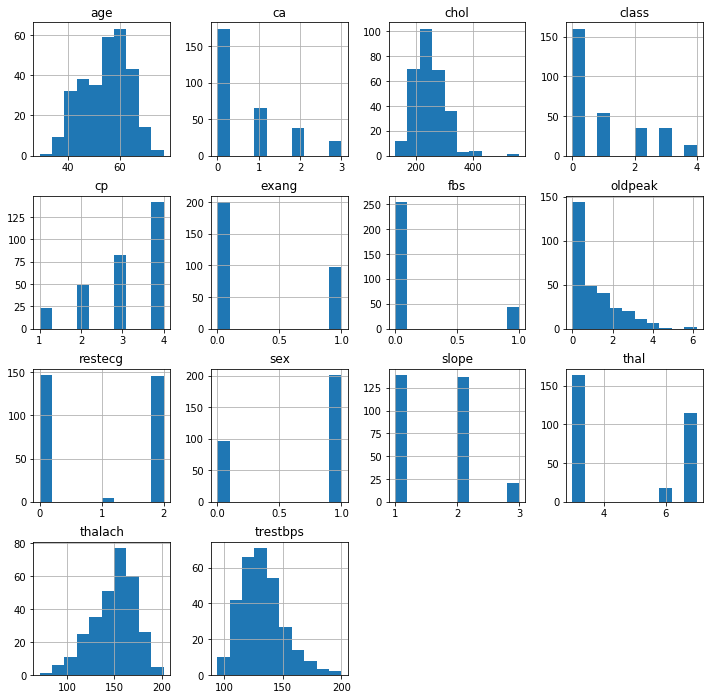

In [7]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [8]:
#Destribution of classes
data["class"].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: class, dtype: int64

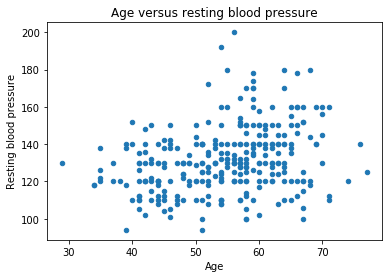

In [9]:
#Let's visualize the age and class relationship with using scatter plot 
data.plot(kind = "scatter", x = "age", y = "trestbps")
plt.title("Age versus resting blood pressure")
plt.xlabel("Age")
plt.ylabel("Resting blood pressure")

plt.show()

### Calcluate descriptive statistics

In [10]:
#print data characteristics, usings pandas built-in describe() function
data.describe()
#Note that NaN, null values are ignored automatically 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## Identifying features/predictors (independent variables) and target/response (dependent variable)

In this example, the features are 13 attributes and the target is class represents the diagnosis of heart disease(0 - no heart disease and 1 - patient has heart disease) 

In [11]:
X = data.loc[:, 'age':'thal'] #independent variables
y = data["class"]

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


## Correlation between dependent and independent variables

The correlation coefficient ranges from -1 to 1. Where, when it is close to 1, it means that there is a strong linear positive correlation. In our example, we have three independent variables (ca,thal,oldpeak) having biggest positive correlation ranging from 0.50-0.52. When the coefficeint is close to -1, it means that there is a strong negative correlation. In our example, we have one strong negative correlation between maximum heart rate achieved (*thalach = -0.42*) and the heart disease type. That means patients with no heart disease tend to have low/medium heart rate. Finally, coefficients close to zero mean that there is no linear correlation. 

Note: the correlation coefficient only measures linear correlations/relationships (like if x goes up, then y goes down/up. It may completely miss out on nonlinear relationships. 

Correlation helps to identify informative features/variables for linear based machine leanring algorithms. Features/variables that close to 0, may be excluded for further analysis. 

In [12]:
#Using corr() method
corr_matrix = data.corr()
corr_matrix["class"].sort_values(ascending=False)

class       1.000000
ca          0.521178
thal        0.513377
oldpeak     0.501461
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
Name: class, dtype: float64

Figure below shows various plots for standard correlation coefficients from Wikipedia

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png">

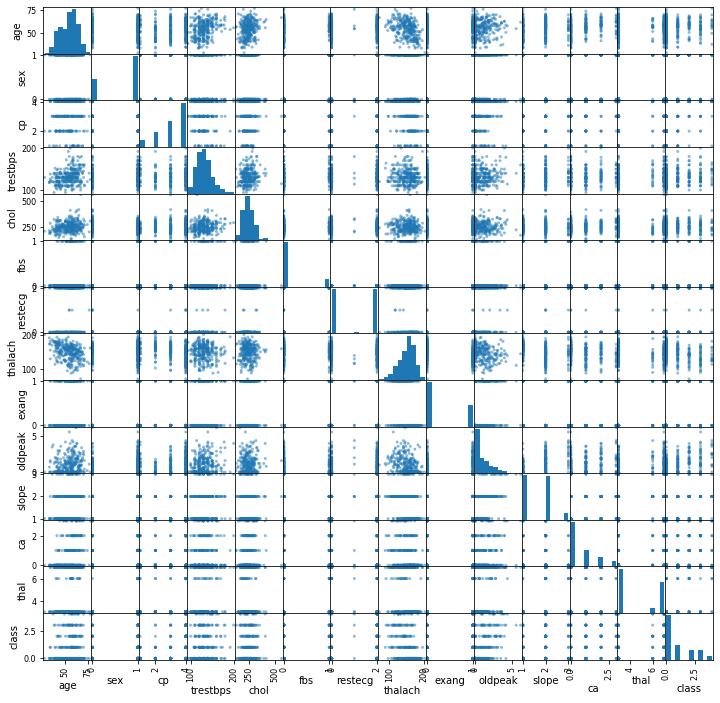

In [15]:
#Using scatter_matrix() method
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(12,12));

The main diagonal (top left to bottom right) shows a histogram of each attribute. 
Many attributes does not have linear correlation with class variable beacuse they are many categorical variables (such as thal,ca, slope,etc.) and class variable it self is categorical. 